In [2]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import warnings
warnings.filterwarnings('ignore')
import math

In [29]:
sample_size = 500
h = 0.1

building distribution with trend $$sin(k*h) + \sqrt{k*h} + N(0,1)$$

Почему кстати разброс значений ряда остатков должен быть минимальным? И почему Закон распределение выборки, соответствующей случайному шуму в
идеале должно быть близко к нормальному распределению?

In [37]:
norm_d = sc.stats.norm.rvs(0, 1, sample_size)
my_d = [0.5 * math.sin(k*h) + norm_d[k] for k in range(sample_size)]

In [38]:
def exp_avg(sample, alfa):
    """
    :param sample: exp_avg method will extract trend from sample
    :param alfa: in [0, 1]; if -> 0, than model takes in account previous values more. Conversely - conversely
    :return: trend by exp_avg
    """
    output = [sample[0]]
    for i in range(1, len(sample)):
        output.append(alfa * sample[i] + (1 - alfa) * output[i-1])

    return output

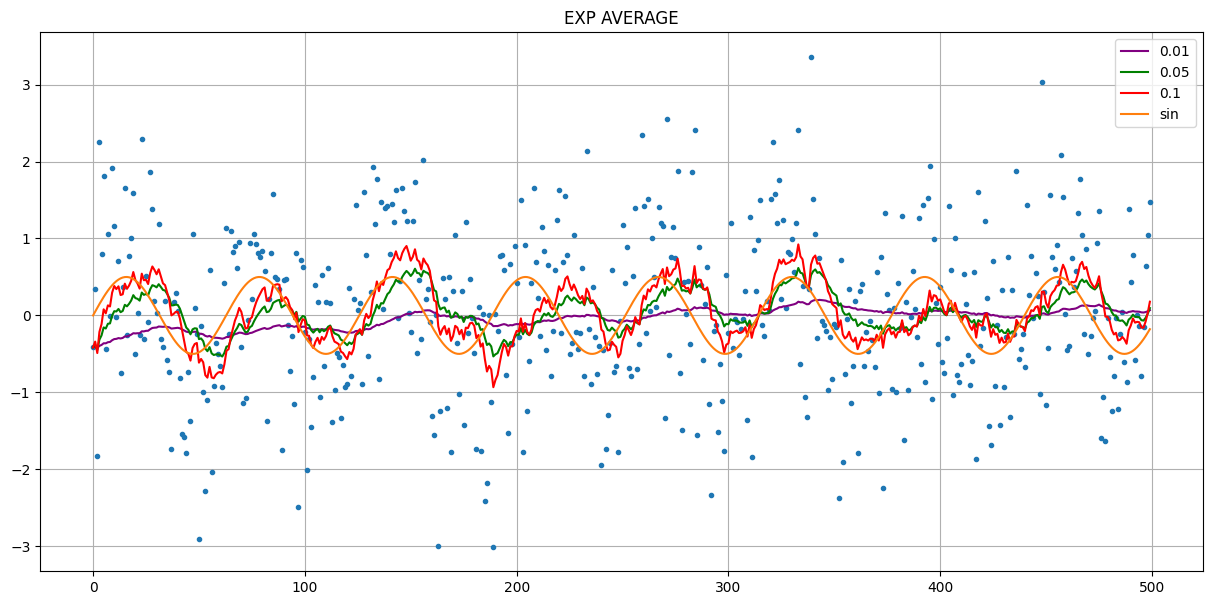

In [39]:
plt.plot(range(sample_size), my_d, '.')
plt.plot(range(sample_size), exp_avg(my_d, 0.01), 'purple', label='0.01')
plt.plot(range(sample_size), exp_avg(my_d, 0.05), 'green', label='0.05')
plt.plot(range(sample_size), exp_avg(my_d, 0.1), 'red', label='0.1')
# plt.plot(range(sample_size), exp_avg(my_d, 0.3), 'yellow', label='0.3')
plt.plot(range(sample_size), [0.5 * math.sin(i*h) for i in range(sample_size)], label='sin')
plt.title('EXP AVERAGE')
plt.grid()
plt.legend()

Fourier transormation

In [45]:
forward = np.fft.fft(my_d)
forward = np.abs(forward[0:len(my_d)//2])
freq = [1/sample_size * k for k in range(sample_size)][0:sample_size//2]

forward_sin = np.fft.fft([math.sin(h * k) for k in range(sample_size)])
forward_sin = np.abs(forward_sin[0:len(my_d)//2])

print('Main sample frequency:', freq[np.argmax(forward)])
print('Main sin frequency:', freq[np.argmax(forward_sin)])

Main sample frequency: 0.016
Main sin frequency: 0.016


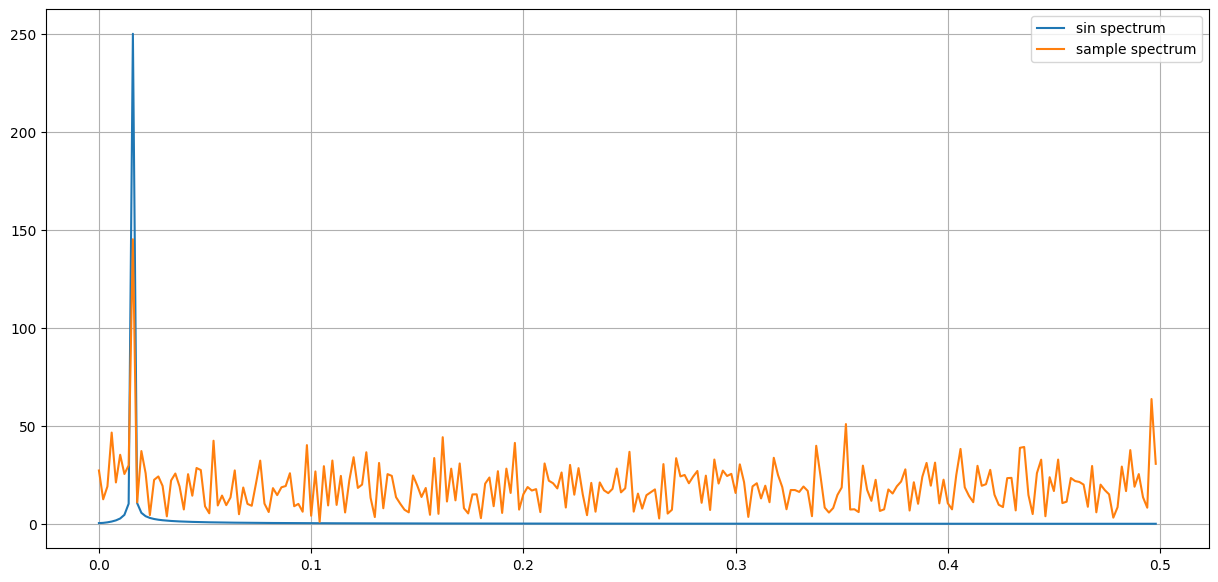

In [44]:
plt.grid()
plt.plot(freq, forward_sin, label='sin spectrum')
plt.plot(freq, forward, label='sample spectrum')
plt.legend()

Check the randomness

In [42]:
def turn_point(lst):
    dx = np.diff(lst, axis=0)
    return np.sum(dx[1:] * dx[:-1] < 0)

th_val_expect = (2/3) * (sample_size - 2)
th_val_disp = math.sqrt((16*sample_size - 29)/sample_size)

def Kendal(noise):
    count = 0
    n = len(noise)
    for i in range(len(noise)):
        for j in range(i):
            if noise[i] > noise[j]:
                count +=1
    return 4*count/(n*(n-1)) - 1

th_val_Kendall_disp = math.sqrt(2*(2 * sample_size+5) / (9*sample_size*(sample_size-1)))

In [43]:
noise001 = np.array(my_d) - np.array(exp_avg(my_d, 0.01))
noise003 = np.array(my_d) - np.array(exp_avg(my_d, 0.03))
noise01 = np.array(my_d) - np.array(exp_avg(my_d, 0.1))

print('Turn points criteria')
print('Theoretical value expectation: ', th_val_expect)
print('Theoretical value dispersion: ', round(th_val_disp, 3))
print('Experiment value minus noise001: ', turn_point(noise001))
print('Experiment value minus noise003: ', turn_point(noise003))
print('Experiment value minus noise01: ', turn_point(noise01))
print()
print('Kendall criteria')
print('Theoretical value Kendall dispersion: ', round(th_val_Kendall_disp, 3))
print('Experiment value minus noise001: ', Kendal(noise001))
print('Experiment value minus noise003: ', Kendal(noise003))
print('Experiment value minus noise01: ', Kendal(noise01))

Turn points criteria
Theoretical value expectation:  332.0
Theoretical value dispersion:  3.993
Experiment value minus noise001:  336
Experiment value minus noise003:  338
Experiment value minus noise01:  338

Kendall criteria
Theoretical value Kendall dispersion:  0.03
Experiment value minus noise001:  -0.06908216432865733
Experiment value minus noise003:  -0.0374188376753507
Experiment value minus noise01:  -0.015503006012024034
